# BasicRNN을 활용한 영화 후기 분석

### [예제 2] BasicRNN을 활용한 영화 후기 분석

 ### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load IMDB Dataset

In [2]:
max_num_words = 5000 # 단어의 총 개수

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_num_words)

print(len(train_data), len(train_labels), len(test_data), len(test_labels))

17465344/17464789 [==============================] - 0s 0us/step
25000 25000 25000 25000


In [3]:
def decode_review(text):
    return ' '.join([rev_word_index.get(i, '?') for i in text])

> ### 특수용도 단어처리 추가

In [4]:
word_index = imdb.get_word_index()

# 특수한 용도의 값 만들기(Dict의 value 0 ~ 3 사용, 따라서 기존 값들은 +3)
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

rev_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review(train_data[0])

1646592/1641221 [==============================] - 0s 0us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what the

> ### 동일한 크기로 문장 변환(단어 처리를 위해서)

In [5]:
print("before padding data length: {}".format(len(train_data[0]), len(train_data[1]))) 

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print("after padding data length: {}".format(len(train_data[0]), len(train_data[1]))) 
print(train_data[0])

before padding data length: 218
after padding data length: 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    

> ### 모델 구성

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(5000, 16, mask_zero=True))
model.add(tf.keras.layers.SimpleRNN(units=64))
# model.add(tf.keras.layers.SimpleRNN(units=8, dropout=0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5184      
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 86,241
Trainable params: 86,241
Non-trainable params: 0
_________________________________________________________________


> ### 모델 컴파일

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

> ### 학습 전 상황

In [8]:
y = model.predict(test_data[:10])
for i in range(10):
  print("[{}] label:{} {} {}".format(i, test_labels[i], y[i], decode_review(test_data[i])))

[0] label:0 [0.48796806] <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast <UNK> terrible performances the show is flat flat flat br br i don't know how michael <UNK> could have allowed this one on his <UNK> he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you <UNK> fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

> ### 학습(Training)

In [9]:
%%time
history = model.fit(train_data, train_labels, shuffle=True,
                    batch_size=100, epochs=20, 
                    validation_data=(test_data, test_labels))

Epoch 1/20
250/250 [==============================] - 52s 208ms/step - loss: 0.6937 - acc: 0.5136 - val_loss: 0.6884 - val_acc: 0.5326
Epoch 2/20
250/250 [==============================] - 52s 207ms/step - loss: 0.6393 - acc: 0.6328 - val_loss: 0.5425 - val_acc: 0.7245
Epoch 3/20
250/250 [==============================] - 52s 208ms/step - loss: 0.4657 - acc: 0.7850 - val_loss: 0.4385 - val_acc: 0.8144
Epoch 4/20
250/250 [==============================] - 54s 214ms/step - loss: 0.3599 - acc: 0.8497 - val_loss: 0.4037 - val_acc: 0.8344
Epoch 5/20
250/250 [==============================] - 52s 209ms/step - loss: 0.3865 - acc: 0.8394 - val_loss: 0.4071 - val_acc: 0.8269
Epoch 6/20
250/250 [==============================] - 52s 207ms/step - loss: 0.3187 - acc: 0.8749 - val_loss: 0.3903 - val_acc: 0.8366
Epoch 7/20
250/250 [==============================] - 52s 207ms/step - loss: 0.3493 - acc: 0.8504 - val_loss: 0.4345 - val_acc: 0.8337
Epoch 8/20
250/250 [==============================] - 5

> ### 모델 평가

In [10]:
results = model.evaluate(test_data,  test_labels, verbose=2)
print(results)

782/782 - 26s - loss: 0.4030 - acc: 0.8280
[0.4029836654663086, 0.8280400037765503]


> ### 학습 후 상황

In [11]:
y = model.predict(test_data[:10])
for i in range(10):
  print("[{}] label:{} {} {}".format(i, test_labels[i], y[i], decode_review(test_data[i])))

[0] label:0 [0.05145482] <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast <UNK> terrible performances the show is flat flat flat br br i don't know how michael <UNK> could have allowed this one on his <UNK> he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you <UNK> fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

> ### Prediction

In [12]:
def sample_predict(line):
  data = []
  for word in line.split():
    # lower case
    word = word.lower()

    # remove symbols such as comma, period, etc. 
    symbols = [',', '.', ':', '-', '+', '/', '*', '&', '%', '[', ']', '^','(', ')', '\"', '\'']
    # make your own list 
    for symbol in symbols: 
      word = word.replace(symbol, '')

    # remove numbers 
    if word.isnumeric():
      word = ''

    #print(word)
    try:
      #print(word_index[word])
      index = word_index[word]
      if index < 5000:
        data.append(word_index[word])
    except KeyError:
      #print('----> no dict: ', word)
      pass

  ndata = np.array([data])
  seq_data = tf.keras.preprocessing.sequence.pad_sequences(ndata, maxlen=256, padding = 'pre', truncating = 'post')
  return model.predict(seq_data[:1])

line = "This is my life movie. The great showman ost cry hundreds of thousands of times"
y = sample_predict(line)
print("{} => {}".format(line, y))

This is my life movie. The great showman ost cry hundreds of thousands of times => [[0.9448948]]


> ### Ploting

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


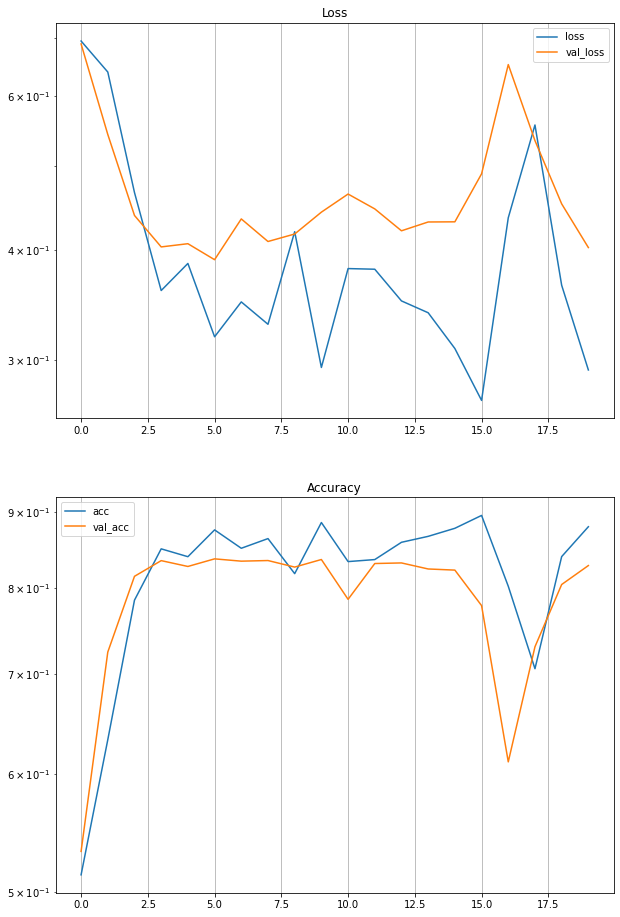

In [13]:
print(history.history.keys())

losses = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10, 16))
plt.subplot(2, 1, 1)
plt.semilogy(losses, label='loss')
plt.semilogy(val_loss, label='val_loss')
plt.grid(True)
plt.legend(loc='best')
plt.title("Loss")

plt.subplot(2, 1, 2)
plt.semilogy(acc, label='acc')
plt.semilogy(val_acc, label='val_acc')
plt.grid(True)
plt.legend(loc='best')
plt.title("Accuracy")
plt.show()